# Laboratorio 1

### Librerías

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1:
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color seg´un los siguientes puntos:

In [11]:
def colores_activos(color,imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    lienzo=np.zeros((alto,ancho,3))
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            switcher = {
                1: [blue,0,0],
                2: [0,green,0],
                3: [0,0,red],
                10: [0,green,red],
                20: [blue,green,0],
                30: [blue,0,red]
            }
            lienzo[i,j] = switcher.get(color)
    cv2.imwrite('nuevo.jpg',lienzo)
    nuevo = cv2.imread('nuevo.jpg')
    nuevo = cv2.cvtColor(nuevo,cv2.COLOR_BGR2RGB)
    return nuevo

<function matplotlib.pyplot.show(close=None, block=None)>

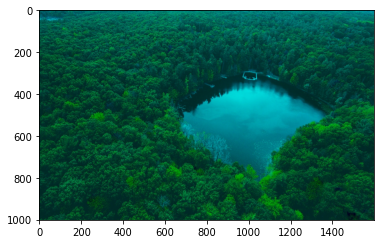

In [12]:
img = cv2.imread('uno.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

nuevo=colores_activos(20,img)
plt.imshow(nuevo)
plt.show

## Problema 2:
En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1, imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imágenes se construya la imagen original a color.

In [13]:
def gris_a_color(nombre):
    azul = cv2.imread(f"{nombre}/{nombre}_salida_gray_azul.jpg")
    rojo = cv2.imread(f"{nombre}/{nombre}_salida_gray_rojo.jpg")
    verde= cv2.imread(f"{nombre}/{nombre}_salida_gray_verde.jpg")
    alto = azul.shape[0]
    ancho = azul.shape[1]
    lienzo=np.zeros((alto,ancho,3))
    for i in range(0,alto):
        for j in range(0,ancho):
            pixelB=azul[i,j]
            pixelR=rojo[i,j]
            pixelV=verde[i,j]
            red=pixelR[0]
            green=pixelV[1]
            blue=pixelB[2]
            lienzo[i,j]= [blue,green,red]
    cv2.imwrite('nuevo.jpg',lienzo)
    nuevo = cv2.imread('nuevo.jpg')
    nuevo = cv2.cvtColor(nuevo,cv2.COLOR_BGR2RGB)
    return nuevo

<function matplotlib.pyplot.show(close=None, block=None)>

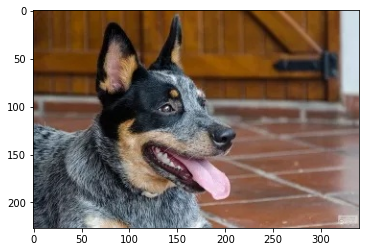

In [14]:
imagen = gris_a_color('perro')
plt.imshow(imagen)
plt.show

## Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [15]:
def a_grises(nombre):
    img = cv2.imread(nombre)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    alto  = img.shape[0]
    ancho = img.shape[1]
    lienzoR=np.zeros((alto,ancho,3))
    lienzoG=np.zeros((alto,ancho,3))
    lienzoB=np.zeros((alto,ancho,3))

    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=img[i,j]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            lienzoR[i,j] = [red,red,red]
            lienzoG[i,j] = [green,green,green]
            lienzoB[i,j] = [blue,blue,blue]
    cv2.imwrite('producida/producida_salida_gray_rojo.jpg',lienzoR)
    cv2.imwrite('producida/producida_salida_gray_verde.jpg',lienzoG)
    cv2.imwrite('producida/producida_salida_gray_azul.jpg',lienzoB)

In [16]:
a_grises('uno.jpg')

## Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media de la distribución

In [17]:
def imagen_gris(imagen):
    alto  = imagen.shape[0]
    ancho = imagen.shape[1]
    nuevo=np.array([])
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            r=pixel[0]+pixel[1]+pixel[2]
            nuevo=np.append(nuevo,r)
    return nuevo

def media_color(imagen):
    colores=[[0,'blue'],[1,'green'],[2,'red'],[3,'gray']]
    for i in colores:
        nuevo=np.array([])
        plt.figure(figsize=(5,3))
        if i[1]!='gray':
            for j in imagen[:,:,i[0]]:
                nuevo=np.append(nuevo,j[:])
        else:
            # gris
            imagen_unica=imagen_gris(imagen)
            nuevo=np.round(imagen_unica/3)
        n = plt.hist(nuevo, bins=255)
        print('Media: ',nuevo.mean())
        x2 = [round(nuevo.mean()),round(nuevo.mean())]
        y2 = [0,n[0].max()]
        plt.plot(x2, y2, color = 'black')
        plt.hist(nuevo,bins=255,color=i[1])
        plt.show()

Media:  69.74798496240601


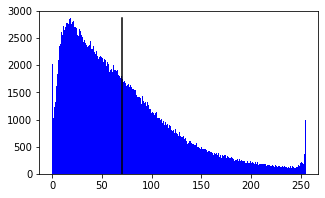

Media:  128.08982330827067


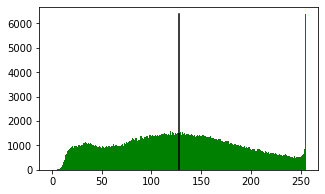

Media:  101.16781954887217


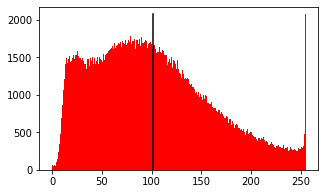

C:\Users\jonhy\AppData\Local\Temp\ipykernel_9060\1784236638.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  r=pixel[0]+pixel[1]+pixel[2]


Media:  41.8215


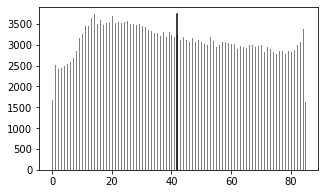

In [18]:
img = cv2.imread("tres.jpg")
media_color(img)

## Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solución única).

In [19]:
img = cv2.imread("uno.jpg")
alto  = img.shape[0]
ancho = img.shape[1]
lienzo=np.zeros((alto,ancho,3))
for i in range(0,alto):
    for j in range(0,ancho):
        pixel=img[i,j]
        r=pixel[0]*0.29894+pixel[1]*0.58704+pixel[2]*0.11402
        r=np.round(r)
        lienzo[i,j] = [r,r,r]
cv2.imwrite('nuevo2.jpg',lienzo)

True

## Problema 6:
Investigue brevemente en que consiste el espacio de color HSV

HSV es un modelo similar al RGB pero difiere en el sistema de coordenadas. HSV presenta los colores de una manera más intuitiva y legible que el RGB típico. El modelo se utiliza a menudo en aplicaciones gráficas, en paletas de colores y para el análisis de imágenes.

HSV significa Tono (color / tono), Saturación (saturación), Valor / Luminancia (ligereza / luminosidad / luminosidad, que no debe confundirse con el brillo).

El tono establece la posición del color en la rueda de colores (de 0' a 360'). La saturación es un porcentaje de la saturación (0% a 100%). El valor es el porcentaje de luminosidad (0% a 100%).

#### Formato

(H: 0-180, S:0-255, V: 255)


# Principales Fuentes

https://wittline.github.io/Computer-Vision-and-Deep-Learning/

https://foroayuda.es/como-detectar-dos-colores-diferentes-usando-cv2-inrange-en-python-opencv/